Trabajo realizado por Felipe Ramírez Vargas
Para ejecutar el notebook debe cargar todas las bases de datos en formato csv que se encuentran en el github

In [ ]:
import sklearn
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.model_selection import *
import xgboost

### Librerías


In [169]:
import os
import re
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.model_selection import *
import xgboost


#Analítica descriptiva

In [3]:
df1=pd.read_csv("MNCAATourneyCompactResults.csv")

In [4]:
df1.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2384 entries, 0 to 2383
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   2384 non-null   int64 
 1   DayNum   2384 non-null   int64 
 2   WTeamID  2384 non-null   int64 
 3   WScore   2384 non-null   int64 
 4   LTeamID  2384 non-null   int64 
 5   LScore   2384 non-null   int64 
 6   WLoc     2384 non-null   object
 7   NumOT    2384 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 149.1+ KB


In [6]:
df1[["WScore","LScore"]].describe()

,WScore,LScore
count,2384.000000,2384.000000
mean,76.833893,65.104446
std,11.813884,11.058517
min,43.000000,29.000000
25%,69.000000,58.000000
50%,76.000000,64.000000
75%,84.000000,72.000000
max,149.000000,115.000000


In [7]:
df_hombres=pd.read_csv("MRegularSeasonCompactResults.csv")

In [8]:
df_mujeres=pd.read_csv("WRegularSeasonCompactResults.csv")

In [9]:
df_hombres.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [10]:
df_hombres[["WTeamID","LTeamID"]].describe()

,WTeamID,LTeamID
count,181682.000000,181682.000000
mean,1287.398317,1282.912897
std,104.742028,104.867272
min,1101.000000,1101.000000
25%,1199.000000,1191.000000
50%,1285.000000,1281.000000
75%,1380.000000,1375.000000
max,1477.000000,1477.000000


In [11]:
df_mujeres[["WTeamID","LTeamID"]].describe()

,WTeamID,LTeamID
count,126173.000000,126173.000000
mean,3284.730267,3284.872215
std,103.862706,105.248679
min,3101.000000,3101.000000
25%,3196.000000,3193.000000
50%,3282.000000,3284.000000
75%,3376.000000,3376.000000
max,3477.000000,3477.000000


In [12]:
df_hombres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181682 entries, 0 to 181681
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Season   181682 non-null  int64 
 1   DayNum   181682 non-null  int64 
 2   WTeamID  181682 non-null  int64 
 3   WScore   181682 non-null  int64 
 4   LTeamID  181682 non-null  int64 
 5   LScore   181682 non-null  int64 
 6   WLoc     181682 non-null  object
 7   NumOT    181682 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 11.1+ MB


In [13]:
df_hombres.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT
count,181682.000000,181682.000000,181682.000000,181682.000000,181682.000000,181682.000000,181682.000000
mean,2005.259514,74.272861,1287.398317,76.746128,1282.912897,64.671569,0.047842
std,11.100080,33.979946,104.742028,11.897763,104.867272,11.236768,0.256532
min,1985.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000
25%,1996.000000,47.000000,1199.000000,69.000000,1191.000000,57.000000,0.000000
50%,2006.000000,77.000000,1285.000000,76.000000,1281.000000,64.000000,0.000000
75%,2015.000000,103.000000,1380.000000,84.000000,1375.000000,72.000000,0.000000
max,2023.000000,132.000000,1477.000000,186.000000,1477.000000,150.000000,6.000000


In [14]:
df_hombres[["WScore","LScore"]].describe()

,WScore,LScore
count,181682.000000,181682.000000
mean,76.746128,64.671569
std,11.897763,11.236768
min,34.000000,20.000000
25%,69.000000,57.000000
50%,76.000000,64.000000
75%,84.000000,72.000000
max,186.000000,150.000000


In [15]:
df_mujeres.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,18,3104,91,3202,41,H,0
1,1998,18,3163,87,3221,76,H,0
2,1998,18,3222,66,3261,59,H,0
3,1998,18,3307,69,3365,62,H,0
4,1998,18,3349,115,3411,35,H,0


In [16]:
df_mujeres[["WScore","LScore"]].describe()

,WScore,LScore
count,126173.000000,126173.000000
mean,71.849437,57.520856
std,11.338444,10.804215
min,30.000000,11.000000
25%,64.000000,50.000000
50%,71.000000,57.000000
75%,79.000000,64.000000
max,140.000000,130.000000


In [17]:
df2=pd.read_csv("MNCAATourneySeeds.csv")

In [18]:
df2.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [19]:
df2["Season"].min()

1985

In [20]:
df2["Season"].max()

2023

In [21]:
df3=pd.read_csv("MRegularSeasonCompactResults.csv")

In [22]:
dfsub=pd.read_csv("SampleSubmission2023.csv")
dfsub

,ID,Pred
0,2023_1101_1102,0.5
1,2023_1101_1103,0.5
2,2023_1101_1104,0.5
3,2023_1101_1105,0.5
4,2023_1101_1106,0.5
...,...,...
130678,2023_3474_3476,0.5
130679,2023_3474_3477,0.5
130680,2023_3475_3476,0.5
130681,2023_3475_3477,0.5


In [23]:
df3.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [24]:
grup1= df3.groupby(['Season', 'WTeamID']).mean()
grup2= df3.groupby(['Season', 'LTeamID']).mean()



<ipython-input-24-6051a1064ccc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grup1= df3.groupby(['Season', 'WTeamID']).mean()
<ipython-input-24-6051a1064ccc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grup2= df3.groupby(['Season', 'LTeamID']).mean()


In [25]:
grup1[["WScore","LScore"]]

WScore     LScore
Season WTeamID                      
1985   1102     71.000000  61.000000
       1103     70.222222  62.666667
       1104     72.095238  58.904762
       1106     75.100000  65.600000
       1108     85.842105  72.000000
...                   ...        ...
2023   1473     83.250000  75.250000
       1474     79.266667  72.000000
       1475     80.384615  70.769231
       1476     70.769231  64.076923
       1477     72.000000  66.750000

[12645 rows x 2 columns]

In [26]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181682 entries, 0 to 181681
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Season   181682 non-null  int64 
 1   DayNum   181682 non-null  int64 
 2   WTeamID  181682 non-null  int64 
 3   WScore   181682 non-null  int64 
 4   LTeamID  181682 non-null  int64 
 5   LScore   181682 non-null  int64 
 6   WLoc     181682 non-null  object
 7   NumOT    181682 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 11.1+ MB


In [27]:
df3.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [28]:
df3[["WScore","LScore"]].describe()

,WScore,LScore
count,181682.000000,181682.000000
mean,76.746128,64.671569
std,11.897763,11.236768
min,34.000000,20.000000
25%,69.000000,57.000000
50%,76.000000,64.000000
75%,84.000000,72.000000
max,186.000000,150.000000


Se genera un dataframe que concatene las bases de datos "seed" de las mujeres y los hombres. Los seed basicamente es una nomenclatura que identifica la región del equipo

In [29]:
df_seeds = pd.concat([
    pd.read_csv("MNCAATourneySeeds.csv"),
    pd.read_csv("WNCAATourneySeeds.csv"),
], ignore_index=True)

df_seeds.tail(30)

,Season,Seed,TeamID
4068,2023,Y05,3450
4069,2023,Y06,3276
4070,2023,Y07,3301
4071,2023,Y08,3329
4072,2023,Y09,3274
4073,2023,Y10,3343
4074,2023,Y11,3424
4075,2023,Y12,3195
4076,2023,Y13,3156
4077,2023,Y14,3218


In [30]:
df_seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4098 entries, 0 to 4097
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Season  4098 non-null   int64 
 1   Seed    4098 non-null   object
 2   TeamID  4098 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 96.2+ KB


In [31]:
df_seeds.isnull().count()

Season    4098
Seed      4098
TeamID    4098
dtype: int64

A continuación se concatenan los resultados tanto para hombres como para mujeres de las temporadas y se exluyen los valores NumOT y WLoc toda vez que no son útiles para el análisis. De manera paralela lo que se busca es identificar, cuales son las temporadas que se han jugado y adicionalmente los puntajes que se han obtenido tanto para los eventos femeninos como para los masculinos

In [32]:
df_season_results = pd.concat([
    pd.read_csv("MRegularSeasonCompactResults.csv"),
    pd.read_csv("WRegularSeasonCompactResults.csv"),
], ignore_index=True)

df_season_results.drop(['NumOT', 'WLoc'], axis=1, inplace=True)

df_season_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore
0,1985,20,1228,81,1328,64
1,1985,25,1106,77,1354,70
2,1985,25,1112,63,1223,56
3,1985,25,1165,70,1432,54
4,1985,25,1192,86,1447,74


In [33]:
df_season_results.tail()


,Season,DayNum,WTeamID,WScore,LTeamID,LScore
307850,2023,132,3179,89,3125,71
307851,2023,132,3221,66,3131,61
307852,2023,132,3235,61,3400,51
307853,2023,132,3284,80,3406,55
307854,2023,132,3357,72,3192,60


In [34]:
df_season_results["Season"]

0         1985
1         1985
2         1985
3         1985
4         1985
          ... 
307850    2023
307851    2023
307852    2023
307853    2023
307854    2023
Name: Season, Length: 307855, dtype: int64

Como se puede observar se han disputado 307851 eventos deportivos desde 1985 hasta el 2023.

In [35]:
df_season_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307855 entries, 0 to 307854
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   Season   307855 non-null  int64
 1   DayNum   307855 non-null  int64
 2   WTeamID  307855 non-null  int64
 3   WScore   307855 non-null  int64
 4   LTeamID  307855 non-null  int64
 5   LScore   307855 non-null  int64
dtypes: int64(6)
memory usage: 14.1 MB


In [36]:
df_season_results.describe()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore
count,307855.000000,307855.000000,307855.000000,307855.000000,307855.000000,307855.000000
mean,2007.565016,73.131594,2105.995917,74.739241,2103.407003,61.740881
std,10.118320,34.481003,987.829906,11.917605,990.160767,11.607099
min,1985.000000,0.000000,1101.000000,30.000000,1101.000000,11.000000
25%,2000.000000,43.000000,1261.000000,66.000000,1254.000000,54.000000
50%,2009.000000,75.000000,1413.000000,74.000000,1408.000000,61.000000
75%,2016.000000,103.000000,3245.000000,82.000000,3245.000000,69.000000
max,2023.000000,132.000000,3477.000000,186.000000,3477.000000,150.000000


Al generar una descripción estadística preliminar de la base de datos se puede percibir que, según la media, los equipos deportivos ganan en promedio con 74,73 puntos y pierden en promedio con 61 puntos. Esta medida a la hora de generar una apuesta, podría ser beneficiosa en cuanto a establecer que los equipos deportivos cuando ganan,normalmente ganan por 75 puntos.

Una medida super importante para hacer el análisis es delimitar cual es la diferencia que existe entre el puntaje del equipo ganador Wscore y el perdedor Lscore, el cuál será siempre un valor positivo. Se hará esta verificación.

In [37]:
df_season_results['Diferencia Puntaje'] = df_season_results['WScore'] - df_season_results['LScore']
df_season_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,Diferencia Puntaje
0,1985,20,1228,81,1328,64,17
1,1985,25,1106,77,1354,70,7
2,1985,25,1112,63,1223,56,7
3,1985,25,1165,70,1432,54,16
4,1985,25,1192,86,1447,74,12


In [38]:
print(df_season_results[df_season_results['LScore']>0].count())

Season                307855
DayNum                307855
WTeamID               307855
WScore                307855
LTeamID               307855
LScore                307855
Diferencia Puntaje    307855
dtype: int64


Como se puede percibir a continuación nuestra teoría es válida y no hay datos erroneos para el análisis. No existe una diferencia de puntaje W-L negativa

In [39]:
df_season_results[df_season_results['Diferencia Puntaje']<0]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,Diferencia Puntaje


Analizamos el data frame si contiene datos nulos, como se puede percibir a continuación no hay presencia de los mismos. Todas las variables tienen 307855 datos.

In [40]:
df_season_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307855 entries, 0 to 307854
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Season              307855 non-null  int64
 1   DayNum              307855 non-null  int64
 2   WTeamID             307855 non-null  int64
 3   WScore              307855 non-null  int64
 4   LTeamID             307855 non-null  int64
 5   LScore              307855 non-null  int64
 6   Diferencia Puntaje  307855 non-null  int64
dtypes: int64(7)
memory usage: 16.4 MB


Adicionalmente, se genera un diagrama de bigotes para percibir la distribución de la data a lo largo de las temporadas.  

In [41]:
print(df_season_results.columns)

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore',
       'Diferencia Puntaje'],
      dtype='object')


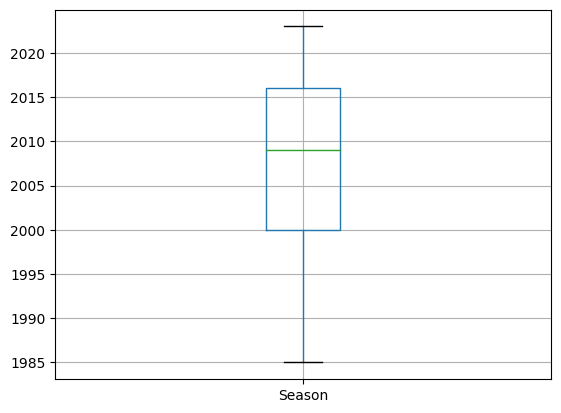

In [42]:
dfbigotes = df_season_results.boxplot(column=['Season'])
dfbigotes.plot()

plt.show()

Como se puede percibir la data se condensa fuertemente desde el año 2000


In [43]:
df_season_results[df_season_results["Season"]<2000]

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,Diferencia Puntaje
0,1985,20,1228,81,1328,64,17
1,1985,25,1106,77,1354,70,7
2,1985,25,1112,63,1223,56,7
3,1985,25,1165,70,1432,54,16
4,1985,25,1192,86,1447,74,12
...,...,...,...,...,...,...,...
189776,1999,131,3403,73,3235,59,14
189777,1999,131,3416,80,3240,59,21
189778,1999,131,3417,85,3112,77,8
189779,1999,131,3449,72,3450,70,2


A continuación se genera mediante la función groupby un agrupamiento teniendo en cuenta la condición W=win (ganar) y L=lose (perder), así se podrán diferenciar el equipo ganador y perdedor,adicionalmente, se podrá consolidar por temporada. Análogamente, se podrá determinar la media de la diferencia de puntajes cuando se gana y pierde

In [44]:
Partidas_ganadas = df_season_results.groupby(['Season', 'WTeamID']).count()
Partidas_ganadas = Partidas_ganadas.reset_index()[['Season', 'WTeamID', 'DayNum']].rename(columns={"DayNum": "Partidas Ganadas", "WTeamID": "TeamID"})

Se agrupa por temporada y equipo ganador

In [45]:
Partidas_ganadas

,Season,TeamID,Partidas Ganadas
0,1985,1102,5
1,1985,1103,9
2,1985,1104,21
3,1985,1106,10
4,1985,1108,19
...,...,...,...
21377,2023,3473,1
21378,2023,3474,5
21379,2023,3475,9
21380,2023,3476,8


In [46]:
Partidas_ganadas[Partidas_ganadas["Season"]<2000]

,Season,TeamID,Partidas Ganadas
0,1985,1102,5
1,1985,1103,9
2,1985,1104,21
3,1985,1106,10
4,1985,1108,19
...,...,...,...
5045,1999,3460,7
5046,1999,3461,6
5047,1999,3462,23
5048,1999,3463,10


In [47]:
Partidas_perdidas = df_season_results.groupby(['Season', 'LTeamID']).count()
Partidas_perdidas = Partidas_perdidas.reset_index()[['Season', 'LTeamID', 'DayNum']].rename(columns={"DayNum": "Partidas Perdidas", "LTeamID": "TeamID"})

In [48]:
Partidas_perdidas

,Season,TeamID,Partidas Perdidas
0,1985,1102,19
1,1985,1103,14
2,1985,1104,9
3,1985,1106,14
4,1985,1108,6
...,...,...,...
21404,2023,3473,24
21405,2023,3474,21
21406,2023,3475,17
21407,2023,3476,20


In [49]:
Difgan = df_season_results.groupby(['Season', 'WTeamID']).mean().reset_index()
Difgan = Difgan[['Season', 'WTeamID', 'Diferencia Puntaje']].rename(columns={"Diferencia Puntaje": "Media Diferencia Puntaje Partidas ganadas", "WTeamID": "TeamID"})

In [50]:
Difgan

,Season,TeamID,Media Diferencia Puntaje Partidas ganadas
0,1985,1102,10.000000
1,1985,1103,7.555556
2,1985,1104,13.190476
3,1985,1106,9.500000
4,1985,1108,13.842105
...,...,...,...
21377,2023,3473,9.000000
21378,2023,3474,10.200000
21379,2023,3475,13.000000
21380,2023,3476,10.125000


In [51]:
Difper = df_season_results.groupby(['Season', 'LTeamID']).mean().reset_index()
Difper = Difper[['Season', 'LTeamID', 'Diferencia Puntaje']].rename(columns={"Diferencia Puntaje": "Media Diferencia Puntaje perdidas", "LTeamID": "TeamID"})

In [52]:
Difper

,Season,TeamID,Media Diferencia Puntaje perdidas
0,1985,1102,9.947368
1,1985,1103,9.857143
2,1985,1104,4.777778
3,1985,1106,13.285714
4,1985,1108,10.666667
...,...,...,...
21404,2023,3473,18.500000
21405,2023,3474,20.523810
21406,2023,3475,12.176471
21407,2023,3476,12.800000


In [53]:
df_features_season_ganadores = df_season_results.groupby(['Season', 'WTeamID']).count().reset_index()[['Season', 'WTeamID']].rename(columns={"WTeamID": "TeamID"})
df_features_season_perdedores = df_season_results.groupby(['Season', 'LTeamID']).count().reset_index()[['Season', 'LTeamID']].rename(columns={"LTeamID": "TeamID"})

In [54]:
df_features_season_ganadores

,Season,TeamID
0,1985,1102
1,1985,1103
2,1985,1104
3,1985,1106
4,1985,1108
...,...,...
21377,2023,3473
21378,2023,3474
21379,2023,3475
21380,2023,3476


In [55]:
df_features_season_perdedores

,Season,TeamID
0,1985,1102
1,1985,1103
2,1985,1104
3,1985,1106
4,1985,1108
...,...,...
21404,2023,3473
21405,2023,3474
21406,2023,3475
21407,2023,3476


In [56]:
df_features_season = pd.concat([df_features_season_ganadores, df_features_season_perdedores], axis=0).drop_duplicates().sort_values(['Season', 'TeamID']).reset_index(drop=True)

In [57]:
df_features_season

,Season,TeamID
0,1985,1102
1,1985,1103
2,1985,1104
3,1985,1106
4,1985,1108
...,...,...
21423,2023,3473
21424,2023,3474
21425,2023,3475
21426,2023,3476


In [58]:
df_features_season = df_features_season.merge(Partidas_ganadas, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(Partidas_perdidas, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(Difgan, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(Difper, on=['Season', 'TeamID'], how='left')

In [59]:
df_features_season

,Season,TeamID,Partidas Ganadas,Partidas Perdidas,Media Diferencia Puntaje Partidas ganadas,Media Diferencia Puntaje perdidas
0,1985,1102,5.0,19.0,10.000000,9.947368
1,1985,1103,9.0,14.0,7.555556,9.857143
2,1985,1104,21.0,9.0,13.190476,4.777778
3,1985,1106,10.0,14.0,9.500000,13.285714
4,1985,1108,19.0,6.0,13.842105,10.666667
...,...,...,...,...,...,...
21423,2023,3473,1.0,24.0,9.000000,18.500000
21424,2023,3474,5.0,21.0,10.200000,20.523810
21425,2023,3475,9.0,17.0,13.000000,12.176471
21426,2023,3476,8.0,20.0,10.125000,12.800000


In [60]:
df_features_season[df_features_season["Season"]==1987]



,Season,TeamID,Partidas Ganadas,Partidas Perdidas,Media Diferencia Puntaje Partidas ganadas,Media Diferencia Puntaje perdidas
565,1987,1102,8.0,15.0,11.750000,12.533333
566,1987,1103,18.0,8.0,12.722222,6.750000
567,1987,1104,26.0,4.0,13.230769,5.250000
568,1987,1106,12.0,13.0,9.416667,10.076923
569,1987,1108,5.0,20.0,6.200000,13.000000
...,...,...,...,...,...,...
850,1987,1458,11.0,17.0,10.181818,12.000000
851,1987,1461,21.0,9.0,9.285714,3.777778
852,1987,1462,14.0,12.0,10.357143,7.250000
853,1987,1463,13.0,12.0,8.153846,8.166667


In [61]:
df_features_season.fillna(0, inplace=True)

In [62]:
df_features_season

,Season,TeamID,Partidas Ganadas,Partidas Perdidas,Media Diferencia Puntaje Partidas ganadas,Media Diferencia Puntaje perdidas
0,1985,1102,5.0,19.0,10.000000,9.947368
1,1985,1103,9.0,14.0,7.555556,9.857143
2,1985,1104,21.0,9.0,13.190476,4.777778
3,1985,1106,10.0,14.0,9.500000,13.285714
4,1985,1108,19.0,6.0,13.842105,10.666667
...,...,...,...,...,...,...
21423,2023,3473,1.0,24.0,9.000000,18.500000
21424,2023,3474,5.0,21.0,10.200000,20.523810
21425,2023,3475,9.0,17.0,13.000000,12.176471
21426,2023,3476,8.0,20.0,10.125000,12.800000


Así a su vez, en primera instancia se podría pensar en que, teniendo el puntaje de los partidos jugados por cada equipo, se podría analizar la media de la diferencia de los partidos cuando se gana y cuando se pierde, esto genera una variable de importancia para cada equipo. A continuación se realiza un ejemplo en aras de demostrar la relevancia de este dato.

Media diferencia Equipo A Gana = 12 puntos
Media diferencia Equipo B Gana = 7 puntos
Media diferencia Equipo A Pierde =2 puntos
Media diferencia Equipo B Pierde = 5 puntos

De esta manera en un enfrentamiento entre el equipo A y el B, el equipo A ganaría en principio toda vez que, normalmente cuando gana hace más puntos que el equipo B y cuando pierde recibe menos puntos que este.


In [63]:
df_features_season.head()

,Season,TeamID,Partidas Ganadas,Partidas Perdidas,Media Diferencia Puntaje Partidas ganadas,Media Diferencia Puntaje perdidas
0,1985,1102,5.0,19.0,10.000000,9.947368
1,1985,1103,9.0,14.0,7.555556,9.857143
2,1985,1104,21.0,9.0,13.190476,4.777778
3,1985,1106,10.0,14.0,9.500000,13.285714
4,1985,1108,19.0,6.0,13.842105,10.666667


La suma de las partidas ganadas debe ser igual a la suma de las partidas pérdidas.

In [64]:
if(df_features_season["Partidas Perdidas"].sum()==df_features_season["Partidas Ganadas"].sum()):
  print("Está bueno")

Está bueno


#Promedio de la diferencia

In [65]:
df_features_season['Proporcion_ganadas'] = df_features_season['Partidas Ganadas'] / (df_features_season['Partidas Ganadas'] + df_features_season['Partidas Perdidas'])
df_features_season['Promedio diferencia'] = (
    (df_features_season['Partidas Ganadas'] * df_features_season['Media Diferencia Puntaje Partidas ganadas'] -
    df_features_season['Partidas Perdidas'] * df_features_season['Media Diferencia Puntaje perdidas'])
    / (df_features_season['Partidas Ganadas'] + df_features_season['Partidas Perdidas'])
)

In [66]:
df_features_season

,Season,TeamID,Partidas Ganadas,Partidas Perdidas,Media Diferencia Puntaje Partidas ganadas,Media Diferencia Puntaje perdidas,Proporcion_ganadas,Promedio diferencia
0,1985,1102,5.0,19.0,10.000000,9.947368,0.208333,-5.791667
1,1985,1103,9.0,14.0,7.555556,9.857143,0.391304,-3.043478
2,1985,1104,21.0,9.0,13.190476,4.777778,0.700000,7.800000
3,1985,1106,10.0,14.0,9.500000,13.285714,0.416667,-3.791667
4,1985,1108,19.0,6.0,13.842105,10.666667,0.760000,7.960000
...,...,...,...,...,...,...,...,...
21423,2023,3473,1.0,24.0,9.000000,18.500000,0.040000,-17.400000
21424,2023,3474,5.0,21.0,10.200000,20.523810,0.192308,-14.615385
21425,2023,3475,9.0,17.0,13.000000,12.176471,0.346154,-3.461538
21426,2023,3476,8.0,20.0,10.125000,12.800000,0.285714,-6.250000


In [67]:

grafico = df_features_season.groupby(["TeamID"])["Promedio diferencia"].mean()

In [68]:
grafico2 = grafico
grafico2.sort_values(ascending=False, inplace=True)
grafico2=grafico2.reset_index(drop=False, inplace=False)

In [69]:
grafico2

,TeamID,Promedio diferencia
0,3163,29.182923
1,3124,17.776276
2,3195,15.934519
3,3181,15.920897
4,3390,15.743799
...,...,...
738,1118,-16.814815
739,3473,-17.400000
740,1289,-19.791667
741,3147,-21.335884


Se analiza el equipo 3163 toda vez que, entrega el promedio de la diferencia mayor por ende, en teoría es el mejor.

In [70]:
df_features_season[(df_features_season["TeamID"]==3163)].head(15)

,Season,TeamID,Partidas Ganadas,Partidas Perdidas,Media Diferencia Puntaje Partidas ganadas,Media Diferencia Puntaje perdidas,Proporcion_ganadas,Promedio diferencia
4186,1998,3163,30.0,2.0,27.166667,9.500000,0.937500,24.875000
4798,1999,3163,27.0,4.0,37.185185,10.500000,0.870968,31.032258
5428,2000,3163,30.0,1.0,31.500000,1.000000,0.967742,30.451613
6061,2001,3163,28.0,2.0,35.678571,10.000000,0.933333,32.633333
6700,2002,3163,33.0,0.0,37.000000,0.000000,1.000000,37.000000
7350,2003,3163,31.0,1.0,23.032258,4.000000,0.968750,22.187500
7999,2004,3163,25.0,4.0,27.000000,5.500000,0.862069,22.517241
8653,2005,3163,23.0,7.0,27.913043,8.142857,0.766667,19.500000
9315,2006,3163,29.0,4.0,21.724138,10.500000,0.878788,17.818182
9984,2007,3163,29.0,3.0,26.103448,6.666667,0.906250,23.031250


Para que sea más sencillo de trabajar solo se dejarán como medidas relevantes, proporción ganadas y promedio diferencia.


In [71]:
df_features_season.drop(['Partidas Ganadas', 'Partidas Perdidas', 'Media Diferencia Puntaje Partidas ganadas', 'Media Diferencia Puntaje perdidas'], axis=1, inplace=True)

In [72]:
df_torneo_resultados = pd.concat([
    pd.read_csv("WNCAATourneyCompactResults.csv"),
    pd.read_csv("MNCAATourneyCompactResults.csv"),
], ignore_index=True)
df_torneo_resultados.drop(['NumOT', 'WLoc'], axis=1, inplace=True)

Es importante este apartado del código, dado que se podría tener en cuenta toda la data, o desde un año en específico, por relevancia, se podrían tomar los datos desde el 2015 los cuales son los mas recientes y que se ajustan al comportamiento esperado.

Temp

In [73]:
dftor = df_torneo_resultados.copy()
dftor = dftor[dftor["Season"]>1998].reset_index(drop=True)

dftor.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore
0,1999,137,3104,80,3212,68
1,1999,137,3112,87,3196,84
2,1999,137,3155,76,3197,45
3,1999,137,3161,71,3169,59
4,1999,137,3163,97,3384,46


In [74]:
dftor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Season   2955 non-null   int64
 1   DayNum   2955 non-null   int64
 2   WTeamID  2955 non-null   int64
 3   WScore   2955 non-null   int64
 4   LTeamID  2955 non-null   int64
 5   LScore   2955 non-null   int64
dtypes: int64(6)
memory usage: 138.6 KB


In [75]:
dftor = pd.merge(
    dftor,
    df_seeds,
    how='left',
    left_on=['Season', 'WTeamID'],
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedW'})

In [76]:
dftor = pd.merge(
    dftor,
    df_seeds,
    how='left',
    left_on=['Season', 'LTeamID'],
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedL'})

In [77]:
dftor.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,SeedW,SeedL
0,1999,137,3104,80,3212,68,Y05,Y12
1,1999,137,3112,87,3196,84,Y06,Y11
2,1999,137,3155,76,3197,45,X02,X15
3,1999,137,3161,71,3169,59,Z02,Z15
4,1999,137,3163,97,3384,46,X01,X16


A la semilla se le quitará la zona es decir "Z,W,etc" para un mejor tratamiento

In [78]:
def borrar_semilla(seed):
    return int(re.sub("[^0-9]", "", seed))

In [79]:
dftor['SeedW'] = dftor['SeedW'].apply(borrar_semilla)
dftor['SeedL'] = dftor['SeedL'].apply(borrar_semilla)

In [80]:
dftor.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,SeedW,SeedL
0,1999,137,3104,80,3212,68,5,12
1,1999,137,3112,87,3196,84,6,11
2,1999,137,3155,76,3197,45,2,15
3,1999,137,3161,71,3169,59,2,15
4,1999,137,3163,97,3384,46,1,16


A continuación lo que se genera es que se consolidan las bases de datos y se disgrega tanto para el equipo ganador como para el perdedor la Medida de la diferencia del puntaje y la proporción de ganadas

In [81]:
dftor = pd.merge(
    dftor,
    df_features_season,
    how='left',
    left_on=['Season', 'WTeamID'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'Partidas Ganadas': 'Partidas GanadasW',
    'Partidas Perdidas': 'Partidas PerdidasW',
    'Media Diferencia Puntaje Partidas ganadas': 'Media Diferencia Puntaje Partidas ganadasW',
    'Media Diferencia Puntaje perdidas': 'Media Diferencia Puntaje perdidasW',
    'Proporcion_ganadas': 'Proporcion_ganadasW',
    'Promedio diferencia': 'Promedio diferenciaW',
}).drop(columns='TeamID', axis=1)

In [82]:
dftor = pd.merge(
    dftor,
    df_features_season,
    how='left',
    left_on=['Season', 'LTeamID'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'Partidas Ganadas': 'Partidas GanadasL',
    'Partidas Perdidas': 'Partidas PerdidasL',
    'Media Diferencia Puntaje Partidas ganadas': 'Media Diferencia Puntaje Partidas ganadasL',
    'Media Diferencia Puntaje perdidas': 'Media Diferencia Puntaje perdidasL',
    'Proporcion_ganadas': 'Proporcion_ganadasL',
    'Promedio diferencia': 'Promedio diferenciaL',
}).drop(columns='TeamID', axis=1)

In [83]:
dftor.head(130)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,SeedW,SeedL,Proporcion_ganadasW,Promedio diferenciaW,Proporcion_ganadasL,Promedio diferenciaL
0,1999,137,3104,80,3212,68,5,12,0.655172,10.551724,0.857143,17.071429
1,1999,137,3112,87,3196,84,6,11,0.629630,4.481481,0.593750,4.968750
2,1999,137,3155,76,3197,45,2,15,0.827586,14.931034,0.620690,4.413793
3,1999,137,3161,71,3169,59,2,15,0.939394,17.818182,0.750000,9.642857
4,1999,137,3163,97,3384,46,1,16,0.870968,31.032258,0.620690,2.344828
...,...,...,...,...,...,...,...,...,...,...,...,...
125,2000,153,3163,71,3397,52,1,1,0.967742,30.451613,0.903226,16.967742
126,2001,137,3155,51,3151,49,5,12,0.689655,7.137931,0.800000,13.366667
127,2001,137,3196,84,3221,52,3,14,0.821429,15.392857,0.724138,3.896552
128,2001,137,3199,72,3408,70,7,10,0.620690,5.793103,0.709677,8.129032


In [84]:
def partidosperdidos(dftor):
    win_rename = {
        "WTeamID": "TeamIdA",
        "WScore" : "ScoreA",
        "LTeamID" : "TeamIdB",
        "LScore": "ScoreB",
     }
    win_rename.update({c : c[:-1] + "A" for c in dftor.columns if c.endswith('W')})
    win_rename.update({c : c[:-1] + "B" for c in dftor.columns if c.endswith('L')})

    lose_rename = {
        "WTeamID": "TeamIdB",
        "WScore" : "ScoreB",
        "LTeamID" : "TeamIdA",
        "LScore": "ScoreA",
    }
    lose_rename.update({c : c[:-1] + "B" for c in dftor.columns if c.endswith('W')})
    lose_rename.update({c : c[:-1] + "A" for c in dftor.columns if c.endswith('L')})

    win_df = dftor.copy()
    lose_df = dftor.copy()

    win_df = win_df.rename(columns=win_rename)
    lose_df = lose_df.rename(columns=lose_rename)

    return pd.concat([win_df, lose_df], axis=0, sort=False)

In [85]:
dftor = partidosperdidos(dftor)

In [86]:
dftor.head()

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,SeedA,SeedB,Proporcion_ganadasA,Promedio diferenciaA,Proporcion_ganadasB,Promedio diferenciaB
0,1999,137,3104,80,3212,68,5,12,0.655172,10.551724,0.857143,17.071429
1,1999,137,3112,87,3196,84,6,11,0.629630,4.481481,0.593750,4.968750
2,1999,137,3155,76,3197,45,2,15,0.827586,14.931034,0.620690,4.413793
3,1999,137,3161,71,3169,59,2,15,0.939394,17.818182,0.750000,9.642857
4,1999,137,3163,97,3384,46,1,16,0.870968,31.032258,0.620690,2.344828


Se buscará generar una diferencia entre los promedios del equipo A y B, así de esta manera si genera un valor positivo significaría que existiría mayor probabilidad de ganar.


In [87]:
columnas_diferencia= ['Proporcion_ganadas', 'Promedio diferencia',]

for col in columnas_diferencia:
    dftor[col + 'Diff'] = dftor[col + 'A'] - dftor[col + 'B']

In [88]:
dftor.head()

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,SeedA,SeedB,Proporcion_ganadasA,Promedio diferenciaA,Proporcion_ganadasB,Promedio diferenciaB,Proporcion_ganadasDiff,Promedio diferenciaDiff
0,1999,137,3104,80,3212,68,5,12,0.655172,10.551724,0.857143,17.071429,-0.201970,-6.519704
1,1999,137,3112,87,3196,84,6,11,0.629630,4.481481,0.593750,4.968750,0.035880,-0.487269
2,1999,137,3155,76,3197,45,2,15,0.827586,14.931034,0.620690,4.413793,0.206897,10.517241
3,1999,137,3161,71,3169,59,2,15,0.939394,17.818182,0.750000,9.642857,0.189394,8.175325
4,1999,137,3163,97,3384,46,1,16,0.870968,31.032258,0.620690,2.344828,0.250278,28.687430


In [89]:
dftor.tail()

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,SeedA,SeedB,Proporcion_ganadasA,Promedio diferenciaA,Proporcion_ganadasB,Promedio diferenciaB,Proporcion_ganadasDiff,Promedio diferenciaDiff
2950,2022,146,1274,50,1242,76,10,1,0.696970,3.787879,0.823529,10.441176,-0.126560,-6.653298
2951,2022,146,1389,49,1314,69,15,8,0.620690,3.931034,0.727273,5.787879,-0.106583,-1.856844
2952,2022,152,1437,65,1242,81,2,1,0.787879,9.545455,0.823529,10.441176,-0.035651,-0.895722
2953,2022,152,1181,77,1314,81,2,8,0.823529,13.029412,0.727273,5.787879,0.096257,7.241533
2954,2022,154,1314,69,1242,72,8,1,0.727273,5.787879,0.823529,10.441176,-0.096257,-4.653298


Agregamos el data set, que nos proporciona la plataforma para la validación

In [90]:
df_test = pd.read_csv("SampleSubmission2023.csv")

In [91]:
df_test.head()

,ID,Pred
0,2023_1101_1102,0.5
1,2023_1101_1103,0.5
2,2023_1101_1104,0.5
3,2023_1101_1105,0.5
4,2023_1101_1106,0.5


In [92]:
df_test.tail()

,ID,Pred
130678,2023_3474_3476,0.5
130679,2023_3474_3477,0.5
130680,2023_3475_3476,0.5
130681,2023_3475_3477,0.5
130682,2023_3476_3477,0.5


In [93]:
df_test['Season'] = df_test['ID'].apply(lambda x: int(x.split('_')[0]))
df_test['TeamIdA'] = df_test['ID'].apply(lambda x: int(x.split('_')[1]))
df_test['TeamIdB'] = df_test['ID'].apply(lambda x: int(x.split('_')[2]))

In [94]:
df_test = pd.merge(
    df_test,
    df_seeds,
    how='left',
    left_on=['Season', 'TeamIdA'],
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedA'}).fillna('W01')

In [95]:
df_test = pd.merge(
    df_test,
    df_seeds,
    how='left',
    left_on=['Season', 'TeamIdB'],
    right_on=['Season', 'TeamID']
).drop('TeamID', axis=1).rename(columns={'Seed': 'SeedB'}).fillna('W01')

In [96]:
df_test['SeedA'] = df_test['SeedA'].apply(borrar_semilla)
df_test['SeedB'] = df_test['SeedB'].apply(borrar_semilla)

In [97]:
df_test = pd.merge(
    df_test,
    df_features_season,
    how='left',
    left_on=['Season', 'TeamIdA'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'Partidas Ganadas': 'Partidas GanadasA',
    'Partidas Perdidas': 'Partidas PerdidasA',
    'Media Diferencia Puntaje Partidas ganadas': 'Media Diferencia Puntaje Partidas ganadasA',
    'Media Diferencia Puntaje perdidas': 'Media Diferencia Puntaje perdidasA',
    'Proporcion_ganadas': 'Proporcion_ganadasA',
    'Promedio diferencia': 'Promedio diferenciaA',
}).drop(columns='TeamID', axis=1)

In [98]:
df_test = pd.merge(
    df_test,
    df_features_season,
    how='left',
    left_on=['Season', 'TeamIdB'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'Partidas Ganadas': 'Partidas GanadasB',
    'Partidas Perdidas': 'Partidas PerdidasB',
    'Media Diferencia Puntaje Partidas ganadas': 'Media Diferencia Puntaje Partidas ganadasB',
    'Media Diferencia Puntaje perdidas': 'Media Diferencia Puntaje perdidasB',
    'Proporcion_ganadas': 'Proporcion_ganadasB',
    'Promedio diferencia': 'Promedio diferenciaB',
}).drop(columns='TeamID', axis=1)

In [99]:
df_test.head()

,ID,Pred,Season,TeamIdA,TeamIdB,SeedA,SeedB,Proporcion_ganadasA,Promedio diferenciaA,Proporcion_ganadasB,Promedio diferenciaB
0,2023_1101_1102,0.5,2023,1101,1102,1,1,0.346154,-3.692308,0.437500,-0.125000
1,2023_1101_1103,0.5,2023,1101,1103,1,1,0.346154,-3.692308,0.645161,5.838710
2,2023_1101_1104,0.5,2023,1101,1104,1,1,0.346154,-3.692308,0.852941,13.676471
3,2023_1101_1105,0.5,2023,1101,1105,1,1,0.346154,-3.692308,0.400000,-3.066667
4,2023_1101_1106,0.5,2023,1101,1106,1,1,0.346154,-3.692308,0.233333,-10.033333


In [100]:
for col in columnas_diferencia:
    df_test[col + 'Diff'] = df_test[col + 'A'] - df_test[col + 'B']

In [101]:
dftor['ScoreDiff'] = dftor['ScoreA'] - dftor['ScoreB']
dftor['WinA'] = (dftor['ScoreDiff'] > 0).astype(int)

In [102]:
dftor.head()

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,SeedA,SeedB,Proporcion_ganadasA,Promedio diferenciaA,Proporcion_ganadasB,Promedio diferenciaB,Proporcion_ganadasDiff,Promedio diferenciaDiff,ScoreDiff,WinA
0,1999,137,3104,80,3212,68,5,12,0.655172,10.551724,0.857143,17.071429,-0.201970,-6.519704,12,1
1,1999,137,3112,87,3196,84,6,11,0.629630,4.481481,0.593750,4.968750,0.035880,-0.487269,3,1
2,1999,137,3155,76,3197,45,2,15,0.827586,14.931034,0.620690,4.413793,0.206897,10.517241,31,1
3,1999,137,3161,71,3169,59,2,15,0.939394,17.818182,0.750000,9.642857,0.189394,8.175325,12,1
4,1999,137,3163,97,3384,46,1,16,0.870968,31.032258,0.620690,2.344828,0.250278,28.687430,51,1


In [103]:
dftor.describe()

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,SeedA,SeedB,Proporcion_ganadasA,Promedio diferenciaA,Proporcion_ganadasB,Promedio diferenciaB,Proporcion_ganadasDiff,Promedio diferenciaDiff,ScoreDiff,WinA
count,5910.000000,5910.000000,5910.000000,5910.000000,5910.000000,5910.000000,5910.000000,5910.000000,5910.000000,5910.000000,5910.000000,5910.000000,5910.000000,5910.000000,5910.000000,5910.000000
mean,2010.174619,139.931980,2272.387648,68.416582,2272.387648,68.416582,6.669543,6.669543,0.764508,11.019316,0.764508,11.019316,0.000000,0.000000,0.000000,0.500000
std,6.782302,4.221059,1002.120384,13.101646,1002.120384,13.101646,4.616254,4.616254,0.106578,6.295822,0.106578,6.295822,0.156834,8.785782,17.983652,0.500042
min,1999.000000,134.000000,1101.000000,21.000000,1101.000000,21.000000,1.000000,1.000000,0.366667,-7.241379,0.366667,-7.241379,-0.633333,-41.878788,-89.000000,0.000000
25%,2004.000000,137.000000,1277.000000,60.000000,1277.000000,60.000000,3.000000,3.000000,0.687500,6.843750,0.687500,6.843750,-0.102912,-5.055292,-12.000000,0.000000
50%,2010.000000,138.000000,1460.000000,68.000000,1460.000000,68.000000,6.000000,6.000000,0.766667,10.117647,0.766667,10.117647,0.000000,0.000000,0.000000,0.500000
75%,2016.000000,141.000000,3280.000000,77.000000,3280.000000,77.000000,10.000000,10.000000,0.843750,14.341146,0.843750,14.341146,0.102912,5.055292,12.000000,1.000000
max,2022.000000,155.000000,3464.000000,140.000000,3464.000000,140.000000,16.000000,16.000000,1.000000,42.060606,1.000000,42.060606,0.633333,41.878788,89.000000,1.000000


In [104]:
dftor.tail()


,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,SeedA,SeedB,Proporcion_ganadasA,Promedio diferenciaA,Proporcion_ganadasB,Promedio diferenciaB,Proporcion_ganadasDiff,Promedio diferenciaDiff,ScoreDiff,WinA
2950,2022,146,1274,50,1242,76,10,1,0.696970,3.787879,0.823529,10.441176,-0.126560,-6.653298,-26,0
2951,2022,146,1389,49,1314,69,15,8,0.620690,3.931034,0.727273,5.787879,-0.106583,-1.856844,-20,0
2952,2022,152,1437,65,1242,81,2,1,0.787879,9.545455,0.823529,10.441176,-0.035651,-0.895722,-16,0
2953,2022,152,1181,77,1314,81,2,8,0.823529,13.029412,0.727273,5.787879,0.096257,7.241533,-4,0
2954,2022,154,1314,69,1242,72,8,1,0.727273,5.787879,0.823529,10.441176,-0.096257,-4.653298,-3,0


In [105]:
dftor[dftor["WinA"]==0].count()

Season                     2955
DayNum                     2955
TeamIdA                    2955
ScoreA                     2955
TeamIdB                    2955
ScoreB                     2955
SeedA                      2955
SeedB                      2955
Proporcion_ganadasA        2955
Promedio diferenciaA       2955
Proporcion_ganadasB        2955
Promedio diferenciaB       2955
Proporcion_ganadasDiff     2955
Promedio diferenciaDiff    2955
ScoreDiff                  2955
WinA                       2955
dtype: int64

In [106]:
dftor[["Season","TeamIdA","TeamIdB",'Promedio diferenciaA', 'Promedio diferenciaB', 'Promedio diferenciaDiff'
]]

,Season,TeamIdA,TeamIdB,Promedio diferenciaA,Promedio diferenciaB,Promedio diferenciaDiff
0,1999,3104,3212,10.551724,17.071429,-6.519704
1,1999,3112,3196,4.481481,4.968750,-0.487269
2,1999,3155,3197,14.931034,4.413793,10.517241
3,1999,3161,3169,17.818182,9.642857,8.175325
4,1999,3163,3384,31.032258,2.344828,28.687430
...,...,...,...,...,...,...
2950,2022,1274,1242,3.787879,10.441176,-6.653298
2951,2022,1389,1314,3.931034,5.787879,-1.856844
2952,2022,1437,1242,9.545455,10.441176,-0.895722
2953,2022,1181,1314,13.029412,5.787879,7.241533


In [107]:
dftor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5910 entries, 0 to 2954
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Season                   5910 non-null   int64  
 1   DayNum                   5910 non-null   int64  
 2   TeamIdA                  5910 non-null   int64  
 3   ScoreA                   5910 non-null   int64  
 4   TeamIdB                  5910 non-null   int64  
 5   ScoreB                   5910 non-null   int64  
 6   SeedA                    5910 non-null   int64  
 7   SeedB                    5910 non-null   int64  
 8   Proporcion_ganadasA      5910 non-null   float64
 9   Promedio diferenciaA     5910 non-null   float64
 10  Proporcion_ganadasB      5910 non-null   float64
 11  Promedio diferenciaB     5910 non-null   float64
 12  Proporcion_ganadasDiff   5910 non-null   float64
 13  Promedio diferenciaDiff  5910 non-null   float64
 14  ScoreDiff               

In [108]:
dftor[["Proporcion_ganadasDiff","Promedio diferenciaDiff","ScoreDiff"]]

,Proporcion_ganadasDiff,Promedio diferenciaDiff,ScoreDiff
0,-0.201970,-6.519704,12
1,0.035880,-0.487269,3
2,0.206897,10.517241,31
3,0.189394,8.175325,12
4,0.250278,28.687430,51
...,...,...,...
2950,-0.126560,-6.653298,-26
2951,-0.106583,-1.856844,-20
2952,-0.035651,-0.895722,-16
2953,0.096257,7.241533,-4


Las características serán las variables importantes para el modelo y que generarán la información para determinar si un equipo es mejor que otro.

In [109]:
dftorhom = dftor[dftor["TeamIdA"]<1478]

In [110]:
dftorhom[["Proporcion_ganadasDiff","Promedio diferenciaDiff","ScoreDiff","WinA"]].describe()

,Proporcion_ganadasDiff,Promedio diferenciaDiff,ScoreDiff,WinA
count,3004.000000,3004.000000,3004.000000,3004.000000
mean,0.000000,0.000000,0.000000,0.500000
std,0.146672,6.704708,14.583461,0.500083
min,-0.633333,-29.057576,-56.000000,0.000000
25%,-0.096257,-4.225511,-10.000000,0.000000
50%,0.000000,0.000000,0.000000,0.500000
75%,0.096257,4.225511,10.000000,1.000000
max,0.633333,29.057576,56.000000,1.000000


In [111]:
dftorhom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3004 entries, 1453 to 2954
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Season                   3004 non-null   int64  
 1   DayNum                   3004 non-null   int64  
 2   TeamIdA                  3004 non-null   int64  
 3   ScoreA                   3004 non-null   int64  
 4   TeamIdB                  3004 non-null   int64  
 5   ScoreB                   3004 non-null   int64  
 6   SeedA                    3004 non-null   int64  
 7   SeedB                    3004 non-null   int64  
 8   Proporcion_ganadasA      3004 non-null   float64
 9   Promedio diferenciaA     3004 non-null   float64
 10  Proporcion_ganadasB      3004 non-null   float64
 11  Promedio diferenciaB     3004 non-null   float64
 12  Proporcion_ganadasDiff   3004 non-null   float64
 13  Promedio diferenciaDiff  3004 non-null   float64
 14  ScoreDiff            

In [112]:
dftormu=dftor[dftor["TeamIdA"]>3100]

In [113]:
dftormu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2906 entries, 0 to 1452
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Season                   2906 non-null   int64  
 1   DayNum                   2906 non-null   int64  
 2   TeamIdA                  2906 non-null   int64  
 3   ScoreA                   2906 non-null   int64  
 4   TeamIdB                  2906 non-null   int64  
 5   ScoreB                   2906 non-null   int64  
 6   SeedA                    2906 non-null   int64  
 7   SeedB                    2906 non-null   int64  
 8   Proporcion_ganadasA      2906 non-null   float64
 9   Promedio diferenciaA     2906 non-null   float64
 10  Proporcion_ganadasB      2906 non-null   float64
 11  Promedio diferenciaB     2906 non-null   float64
 12  Proporcion_ganadasDiff   2906 non-null   float64
 13  Promedio diferenciaDiff  2906 non-null   float64
 14  ScoreDiff               

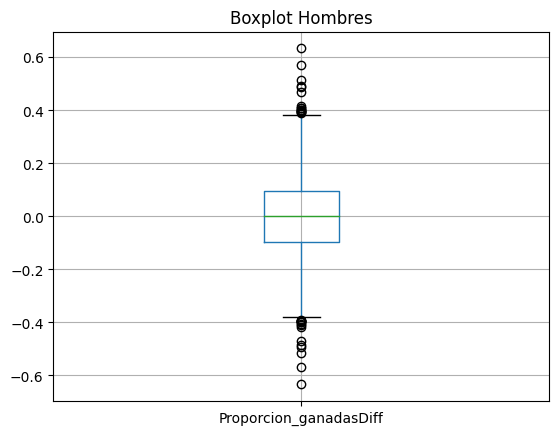

In [114]:
dfbigoteshom = dftorhom.boxplot(column=["Proporcion_ganadasDiff"])
plt.title('Boxplot Hombres')
dfbigoteshom.plot()


plt.show()

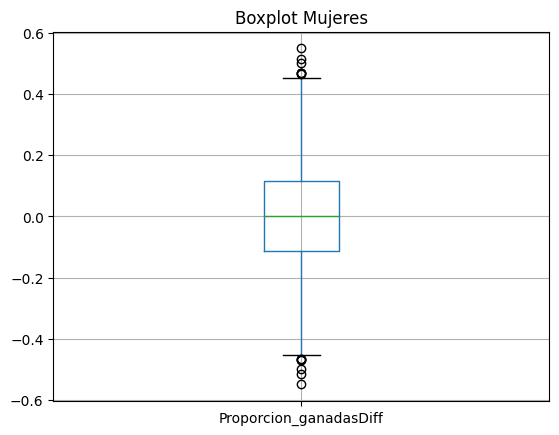

In [115]:
dfbigotesmuj = dftormu.boxplot(column=["Proporcion_ganadasDiff"])
plt.title('Boxplot Mujeres')
dfbigotesmuj.plot()


plt.show()

In [116]:
dftormu["Proporcion_ganadasDiff"].describe()

count    2906.000000
mean        0.000000
std         0.166714
min        -0.548387
25%        -0.114286
50%         0.000000
75%         0.114286
max         0.548387
Name: Proporcion_ganadasDiff, dtype: float64

In [117]:
dftorhom["Proporcion_ganadasDiff"].describe()

count    3004.000000
mean        0.000000
std         0.146672
min        -0.633333
25%        -0.096257
50%         0.000000
75%         0.096257
max         0.633333
Name: Proporcion_ganadasDiff, dtype: float64

In [118]:
dftorhom["Promedio diferenciaDiff"].describe()

count    3004.000000
mean        0.000000
std         6.704708
min       -29.057576
25%        -4.225511
50%         0.000000
75%         4.225511
max        29.057576
Name: Promedio diferenciaDiff, dtype: float64

In [119]:
dftormu["Promedio diferenciaDiff"].describe()

count    2.906000e+03
mean     3.129713e-16
std      1.051384e+01
min     -4.187879e+01
25%     -6.313553e+00
50%      0.000000e+00
75%      6.313553e+00
max      4.187879e+01
Name: Promedio diferenciaDiff, dtype: float64

In [120]:
dftorhom["ScoreDiff"].describe()

count    3004.000000
mean        0.000000
std        14.583461
min       -56.000000
25%       -10.000000
50%         0.000000
75%        10.000000
max        56.000000
Name: ScoreDiff, dtype: float64

In [121]:
dftormu["ScoreDiff"].describe()

count    2906.000000
mean        0.000000
std        20.928285
min       -89.000000
25%       -14.000000
50%         0.000000
75%        14.000000
max        89.000000
Name: ScoreDiff, dtype: float64

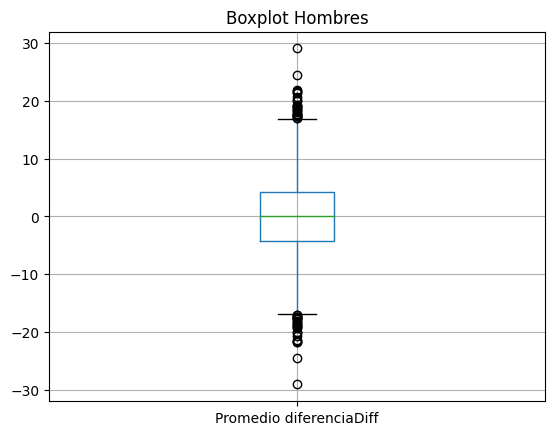

In [122]:
dfbigoteshom = dftorhom.boxplot(column=["Promedio diferenciaDiff"])
plt.title('Boxplot Hombres')
dfbigoteshom.plot()


plt.show()






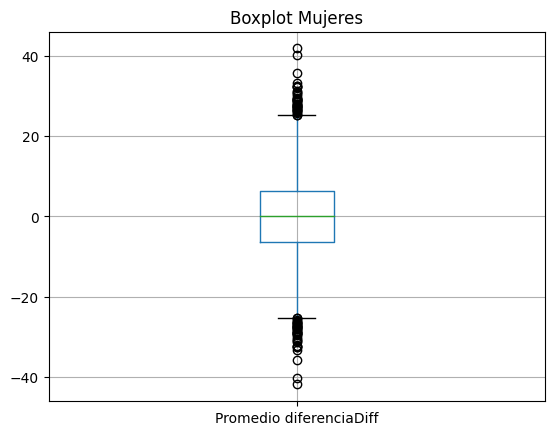

In [123]:
dfbigotesmuj = dftormu.boxplot(column=["Promedio diferenciaDiff"])
plt.title('Boxplot Mujeres')
dfbigotesmuj.plot()


plt.show()

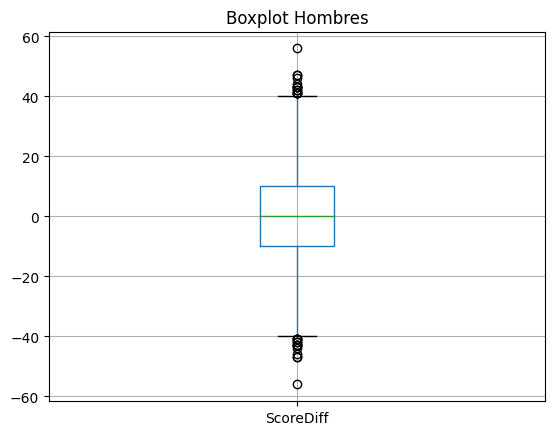

In [124]:
dfbigoteshom = dftorhom.boxplot(column=["ScoreDiff"])
plt.title('Boxplot Hombres')
dfbigoteshom.plot()


plt.show()





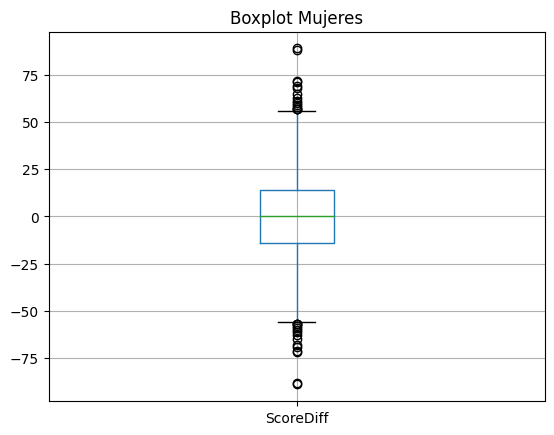

In [125]:
dfbigotesmuj = dftormu.boxplot(column=["ScoreDiff"])
plt.title('Boxplot Mujeres')
dfbigotesmuj.plot()


plt.show()

In [126]:
dftorhom[['Promedio diferenciaA', 'Promedio diferenciaB', 'Promedio diferenciaDiff'
]].describe()

,Promedio diferenciaA,Promedio diferenciaB,Promedio diferenciaDiff
count,3004.000000,3004.000000,3004.000000
mean,9.157275,9.157275,0.000000
std,4.641034,4.641034,6.704708
min,-7.241379,-7.241379,-29.057576
25%,6.060606,6.060606,-4.225511
50%,8.969697,8.969697,0.000000
75%,11.975000,11.975000,4.225511
max,25.424242,25.424242,29.057576


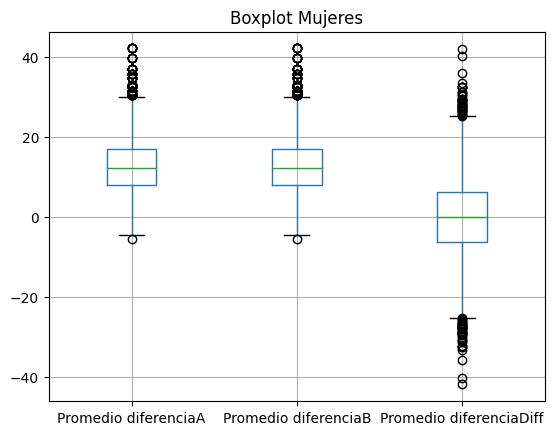

In [127]:
dfbigotesmuj = dftormu.boxplot(column=['Promedio diferenciaA', 'Promedio diferenciaB', 'Promedio diferenciaDiff'
])
plt.title('Boxplot Mujeres')
dfbigotesmuj.plot()

plt.show()

In [128]:
dftormu[['Promedio diferenciaA', 'Promedio diferenciaB', 'Promedio diferenciaDiff'
]].describe()

,Promedio diferenciaA,Promedio diferenciaB,Promedio diferenciaDiff
count,2906.000000,2906.000000,2.906000e+03
mean,12.944152,12.944152,3.129713e-16
std,7.146195,7.146195,1.051384e+01
min,-5.593750,-5.593750,-4.187879e+01
25%,8.000000,8.000000,-6.313553e+00
50%,12.123106,12.123106,0.000000e+00
75%,16.877747,16.877747,6.313553e+00
max,42.060606,42.060606,4.187879e+01


In [129]:
dftorhom.head()

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,SeedA,SeedB,Proporcion_ganadasA,Promedio diferenciaA,Proporcion_ganadasB,Promedio diferenciaB,Proporcion_ganadasDiff,Promedio diferenciaDiff,ScoreDiff,WinA
1453,1999,136,1116,94,1373,80,4,13,0.687500,7.125000,0.833333,7.633333,-0.145833,-0.508333,14,1
1454,1999,136,1120,80,1457,41,1,16,0.900000,20.300000,0.714286,4.000000,0.185714,16.300000,39,1
1455,1999,136,1163,91,1427,66,1,16,0.933333,16.766667,0.615385,1.538462,0.317949,15.228205,25,1
1456,1999,136,1166,62,1257,58,10,7,0.724138,8.172414,0.655172,7.482759,0.068966,0.689655,4,1
1457,1999,136,1178,56,1417,53,12,5,0.821429,9.857143,0.733333,6.733333,0.088095,3.123810,3,1


In [130]:
dftormu.head()

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,SeedA,SeedB,Proporcion_ganadasA,Promedio diferenciaA,Proporcion_ganadasB,Promedio diferenciaB,Proporcion_ganadasDiff,Promedio diferenciaDiff,ScoreDiff,WinA
0,1999,137,3104,80,3212,68,5,12,0.655172,10.551724,0.857143,17.071429,-0.201970,-6.519704,12,1
1,1999,137,3112,87,3196,84,6,11,0.629630,4.481481,0.593750,4.968750,0.035880,-0.487269,3,1
2,1999,137,3155,76,3197,45,2,15,0.827586,14.931034,0.620690,4.413793,0.206897,10.517241,31,1
3,1999,137,3161,71,3169,59,2,15,0.939394,17.818182,0.750000,9.642857,0.189394,8.175325,12,1
4,1999,137,3163,97,3384,46,1,16,0.870968,31.032258,0.620690,2.344828,0.250278,28.687430,51,1


In [131]:
caracteristica = [
    'Proporcion_ganadasA', 'Promedio diferenciaA', 'Proporcion_ganadasB', 'Promedio diferenciaB', 'Proporcion_ganadasDiff', 'Promedio diferenciaDiff'
]

In [132]:
def minmax(caracteristica, df_train, df_val, df_test=None):
    min_ = df_train[caracteristica].min()
    max_ = df_train[caracteristica].max()

    df_train[caracteristica] = (df_train[caracteristica] - min_) / (max_ - min_)
    df_val[caracteristica] = (df_val[caracteristica] - min_) / (max_ - min_)

    if df_test is not None:
        df_test[caracteristica] = (df_test[caracteristica] - min_) / (max_ - min_)

    return df_train, df_val, df_test

In [172]:
def kfold(dftor, df_test_=None, plot=False, verbose=0, mode="a"):
    seasons = dftor['Season'].unique()
    cvs = []
    cvs2 =[]
    pred_tests = []
    target = "ScoreDiff" if mode == "reg" else "WinA"

    for season in seasons[1:]:
        if verbose:
            print(f'\nValidating on season {season}')

        df_train = dftor[dftor['Season'] < season].reset_index(drop=True).copy()
        df_val = dftor[dftor['Season'] == season].reset_index(drop=True).copy()
        df_test = df_test_.copy()

        df_train, df_val, df_test = minmax(caracteristica, df_train, df_val, df_test)

        if mode == "reg":
            model = ElasticNet(alpha=1, l1_ratio=0.5)

        else:
            model = LogisticRegression(C=1)

        model.fit(df_train[caracteristica], df_train[target])

        if mode == "reg":
            pred = model.predict(df_val[caracteristica])
        else:
            pred = model.predict_proba(df_val[caracteristica])[:, 1]

        if df_test is not None:
            if mode == "reg":
                pred_test = model.predict(df_test[caracteristica])


                pred_test = (pred_test - pred_test.min()) / (pred_test.max() - pred_test.min())
            else:
                pred_test = model.predict_proba(df_test[caracteristica])[:, 1]

            pred_tests.append(pred_test)

        if plot:
            plt.figure(figsize=(15, 6))
            plt.subplot(1, 2, 1)
            plt.scatter(pred, df_val['ScoreDiff'].values, s=5)
            plt.title('Prediction vs Score Diff')
            plt.grid(True)
            plt.subplot(1, 2, 2)
            sns.histplot(pred, bins=20)
            plt.title('Predictions probability repartition')
            plt.show()

        pred = (pred - pred.min()) / (pred.max() - pred.min())
        pred = np.clip(pred, 0, 1)

        MSE = (((df_val['WinA'].values - pred))**2).mean()
        MAE =np.abs(((df_val['WinA'].values - pred))).mean()
        cvs.append(MSE)
        cvs2.append(MAE)



        if verbose:
            print(f'\t -> MSE {MSE:.3f}')
            print(f'\t -> MAE {MAE:.3f}')



    print(f'\n Local MSE is {np.mean(cvs):.3f}')
    print(f'\n Local MAE is {np.mean(cvs2):.3f}')


    return pred_tests

In [173]:
pred_tests = kfold(dftor, df_test, plot=False, verbose=1, mode="log")


Validating on season 2000
	 -> MSE 0.206
	 -> MAE 0.410

Validating on season 2001
	 -> MSE 0.194
	 -> MAE 0.399

Validating on season 2002
	 -> MSE 0.200
	 -> MAE 0.403

Validating on season 2003
	 -> MSE 0.191
	 -> MAE 0.390

Validating on season 2004
	 -> MSE 0.198
	 -> MAE 0.397

Validating on season 2005
	 -> MSE 0.186
	 -> MAE 0.376

Validating on season 2006
	 -> MSE 0.178
	 -> MAE 0.379

Validating on season 2007
	 -> MSE 0.187
	 -> MAE 0.379

Validating on season 2008
	 -> MSE 0.169
	 -> MAE 0.360

Validating on season 2009
	 -> MSE 0.193
	 -> MAE 0.383

Validating on season 2010
	 -> MSE 0.198
	 -> MAE 0.390

Validating on season 2011
	 -> MSE 0.206
	 -> MAE 0.388

Validating on season 2012
	 -> MSE 0.200
	 -> MAE 0.392

Validating on season 2013
	 -> MSE 0.213
	 -> MAE 0.404

Validating on season 2014
	 -> MSE 0.199
	 -> MAE 0.398

Validating on season 2015
	 -> MSE 0.184
	 -> MAE 0.374

Validating on season 2016
	 -> MSE 0.207
	 -> MAE 0.407

Validating on season 2017
	 ->

In [153]:
pred_testselas = kfold(dftor, df_test, plot=False, verbose=1, mode="reg")


Validating on season 2000
	 -> MSE 0.212

Validating on season 2001
	 -> MSE 0.206

Validating on season 2002
	 -> MSE 0.210

Validating on season 2003
	 -> MSE 0.201

Validating on season 2004
	 -> MSE 0.212

Validating on season 2005
	 -> MSE 0.193

Validating on season 2006
	 -> MSE 0.198

Validating on season 2007
	 -> MSE 0.197

Validating on season 2008
	 -> MSE 0.184

Validating on season 2009
	 -> MSE 0.198

Validating on season 2010
	 -> MSE 0.202

Validating on season 2011
	 -> MSE 0.210

Validating on season 2012
	 -> MSE 0.211

Validating on season 2013
	 -> MSE 0.216

Validating on season 2014
	 -> MSE 0.214

Validating on season 2015
	 -> MSE 0.206

Validating on season 2016
	 -> MSE 0.220

Validating on season 2017
	 -> MSE 0.212

Validating on season 2018
	 -> MSE 0.214

Validating on season 2019
	 -> MSE 0.204

Validating on season 2021
	 -> MSE 0.223

Validating on season 2022
	 -> MSE 0.222

 Local MSE is 0.207


In [135]:
final_sub = df_test[['ID', "Pred"]].copy()
final_sub.to_csv('submission.csv', index=False)

In [136]:
df_test

,ID,Pred,Season,TeamIdA,TeamIdB,SeedA,SeedB,Proporcion_ganadasA,Promedio diferenciaA,Proporcion_ganadasB,Promedio diferenciaB,Proporcion_ganadasDiff,Promedio diferenciaDiff
0,2023_1101_1102,0.5,2023,1101,1102,1,1,0.346154,-3.692308,0.437500,-0.125000,-0.091346,-3.567308
1,2023_1101_1103,0.5,2023,1101,1103,1,1,0.346154,-3.692308,0.645161,5.838710,-0.299007,-9.531017
2,2023_1101_1104,0.5,2023,1101,1104,1,1,0.346154,-3.692308,0.852941,13.676471,-0.506787,-17.368778
3,2023_1101_1105,0.5,2023,1101,1105,1,1,0.346154,-3.692308,0.400000,-3.066667,-0.053846,-0.625641
4,2023_1101_1106,0.5,2023,1101,1106,1,1,0.346154,-3.692308,0.233333,-10.033333,0.112821,6.341026
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130678,2023_3474_3476,0.5,2023,3474,3476,1,1,0.192308,-14.615385,0.285714,-6.250000,-0.093407,-8.365385
130679,2023_3474_3477,0.5,2023,3474,3477,1,1,0.192308,-14.615385,0.406250,-5.000000,-0.213942,-9.615385
130680,2023_3475_3476,0.5,2023,3475,3476,1,1,0.346154,-3.461538,0.285714,-6.250000,0.060440,2.788462
130681,2023_3475_3477,0.5,2023,3475,3477,1,1,0.346154,-3.461538,0.406250,-5.000000,-0.060096,1.538462


In [145]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130683 entries, 0 to 130682
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       130683 non-null  object 
 1   Pred                     130683 non-null  float64
 2   Season                   130683 non-null  int64  
 3   TeamIdA                  130683 non-null  int64  
 4   TeamIdB                  130683 non-null  int64  
 5   SeedA                    130683 non-null  int64  
 6   SeedB                    130683 non-null  int64  
 7   Proporcion_ganadasA      130683 non-null  float64
 8   Promedio diferenciaA     130683 non-null  float64
 9   Proporcion_ganadasB      130683 non-null  float64
 10  Promedio diferenciaB     130683 non-null  float64
 11  Proporcion_ganadasDiff   130683 non-null  float64
 12  Promedio diferenciaDiff  130683 non-null  float64
 13  pred                     130683 non-null  float64
dtypes: f

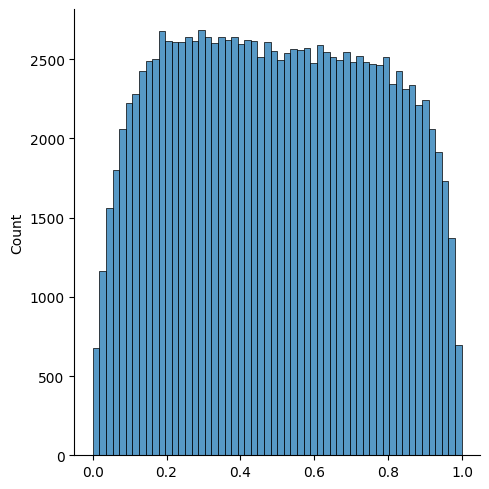

In [141]:
pred_test = np.mean(pred_tests, 0)
df_test['pred'] = pred_test

_ = sns.displot(pred_test)

In [ ]:
pred_test

array([0.37765366, 0.20603258, 0.08028305, ..., 0.59555507, 0.54592333,
       0.449519  ])

In [ ]:
a = pred_test>0.5

In [ ]:

a= (pred_test > 0.5).astype(int)

In [ ]:
a

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
a[2]

0

In [ ]:
pred_test[2]

0.08028305366703245

Se evidencia que si existe una probabilidad baja, debe perder

In [138]:
final_sub = df_test[['ID', 'pred']].copy()
final_sub.to_csv('submission.csv', index=False)

In [140]:
final_sub.head(10)

,ID,pred
0,2023_1101_1102,0.377654
1,2023_1101_1103,0.206033
2,2023_1101_1104,0.080283
3,2023_1101_1105,0.475150
4,2023_1101_1106,0.705072
5,2023_1101_1107,0.701167
6,2023_1101_1108,0.443363
7,2023_1101_1110,0.383502
8,2023_1101_1111,0.389097
9,2023_1101_1112,0.108855


In [146]:
final_sub.tail(10)

,ID,pred
130673,2023_3473_3474,0.397699
130674,2023_3473_3475,0.126894
130675,2023_3473_3476,0.175806
130676,2023_3473_3477,0.148533
130677,2023_3474_3475,0.180176
130678,2023_3474_3476,0.243988
130679,2023_3474_3477,0.208522
130680,2023_3475_3476,0.595555
130681,2023_3475_3477,0.545923
130682,2023_3476_3477,0.449519


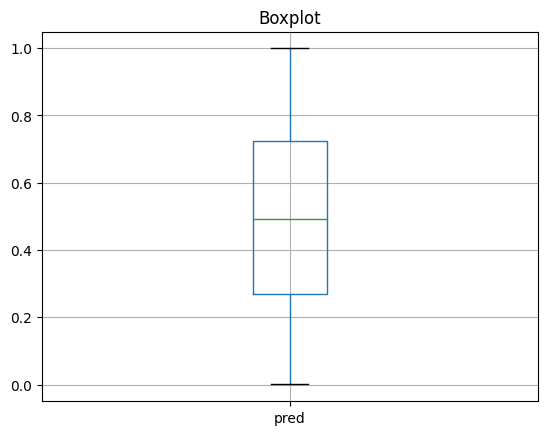

In [168]:
dffinal = final_sub.boxplot(column=['pred'
])
plt.title('Boxplot')
dffinal .plot()

plt.show()

In [147]:
final_sub['Season'] = df_test['ID'].apply(lambda x: int(x.split('_')[0]))
final_sub['TeamIdA'] = df_test['ID'].apply(lambda x: int(x.split('_')[1]))
final_sub['TeamIdB'] = df_test['ID'].apply(lambda x: int(x.split('_')[2]))

In [150]:
final_hm = final_sub[["pred","TeamIdA","TeamIdB"]]

In [153]:
final_hm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130683 entries, 0 to 130682
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   pred     130683 non-null  float64
 1   TeamIdA  130683 non-null  int64  
 2   TeamIdB  130683 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 4.0 MB


In [155]:
FH=final_hm[final_hm["TeamIdA"]<1478]
FH

,pred,TeamIdA,TeamIdB
0,0.377654,1101,1102
1,0.206033,1101,1103
2,0.080283,1101,1104
3,0.475150,1101,1105
4,0.705072,1101,1106
...,...,...,...
65698,0.644984,1474,1476
65699,0.627718,1474,1477
65700,0.609409,1475,1476
65701,0.591526,1475,1477


In [156]:
FM=final_hm[final_hm["TeamIdA"]>=1478]
FM

,pred,TeamIdA,TeamIdB
65703,0.651124,3101,3102
65704,0.594476,3101,3103
65705,0.250960,3101,3104
65706,0.708621,3101,3105
65707,0.780683,3101,3106
...,...,...,...
130678,0.243988,3474,3476
130679,0.208522,3474,3477
130680,0.595555,3475,3476
130681,0.545923,3475,3477


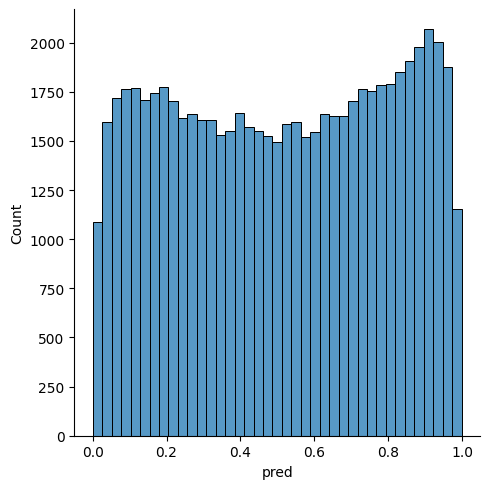

In [164]:
sns.displot(FM["pred"])

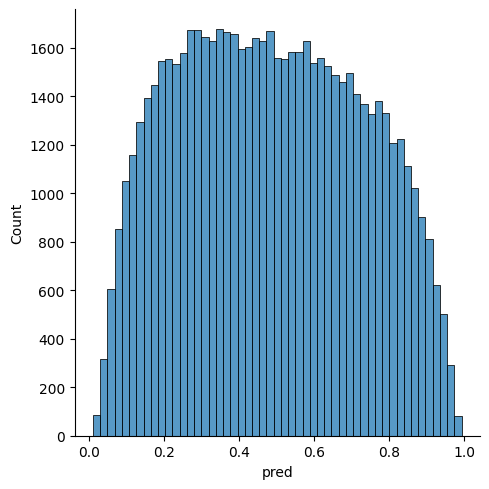

In [167]:
sns.displot(FH["pred"])

XGBOOST

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import xgboost as xgb

In [ ]:
def kfold2(dftor, df_test_=None, plot=False, verbose=0, mode="a"):
    seasons = dftor['Season'].unique()
    cvs = []
    cvs2 =[]
    pred_tests = []
    target = "ScoreDiff" if mode == "reg" else "WinA"

    for season in seasons[1:]:
        if verbose:
            print(f'\nValidating on season {season}')

        df_train = dftor[dftor['Season'] < season].reset_index(drop=True).copy()
        df_val = dftor[dftor['Season'] == season].reset_index(drop=True).copy()
        df_test = df_test_.copy()

        df_train, df_val, df_test = minmax(caracteristica, df_train, df_val, df_test)

        if mode == "reg":
            model = ElasticNet(alpha=1, l1_ratio=0.5)

        else:
            model = model = XGBClassifier()

        model.fit(df_train[caracteristica], df_train[target])

        if mode == "reg":
            pred = model.predict(df_val[caracteristica])
        else:
            pred = model.predict_proba(df_val[caracteristica])[:, 1]

        if df_test is not None:
            if mode == "reg":
                pred_test = model.predict(df_test[caracteristica])


                pred_test = (pred_test - pred_test.min()) / (pred_test.max() - pred_test.min())
            else:
                pred_test = model.predict_proba(df_test[caracteristica])[:, 1]

            pred_tests.append(pred_test)

        if plot:
            plt.figure(figsize=(15, 6))
            plt.subplot(1, 2, 1)
            plt.scatter(pred, df_val['ScoreDiff'].values, s=5)
            plt.title('Prediction vs Score Diff')
            plt.grid(True)
            plt.subplot(1, 2, 2)
            sns.histplot(pred, bins=20)
            plt.title('Predictions probability repartition')
            plt.show()

        pred = (pred - pred.min()) / (pred.max() - pred.min())
        pred = np.clip(pred, 0, 1)

        MSE = (((df_val['WinA'].values - pred))**2).mean()
        MAE =np.abs(((df_val['WinA'].values - pred))).mean()
        cvs.append(MSE)
        cvs2.append(MAE)



        if verbose:
            print(f'\t -> MSE {MSE:.3f}')
            #print(f'\t -> MAE {MAE:.3f}')



    print(f'\n Local MSE is {np.mean(cvs):.3f}')
   # print(f'\n Local MAE is {np.mean(cvs2):.3f}')


    return pred_tests

In [ ]:
pred_tests2 = kfold2(dftor, df_test, plot=False, verbose=1, mode="XGBoost")


Validating on season 2000
	 -> MSE 0.264

Validating on season 2001
	 -> MSE 0.258

Validating on season 2002
	 -> MSE 0.322

Validating on season 2003
	 -> MSE 0.257

Validating on season 2004
	 -> MSE 0.256

Validating on season 2005
	 -> MSE 0.198

Validating on season 2006
	 -> MSE 0.189

Validating on season 2007
	 -> MSE 0.237

Validating on season 2008
	 -> MSE 0.219

Validating on season 2009
	 -> MSE 0.252

Validating on season 2010
	 -> MSE 0.246

Validating on season 2011
	 -> MSE 0.233

Validating on season 2012
	 -> MSE 0.236

Validating on season 2013
	 -> MSE 0.262

Validating on season 2014
	 -> MSE 0.204

Validating on season 2015
	 -> MSE 0.210

Validating on season 2016
	 -> MSE 0.211

Validating on season 2017
	 -> MSE 0.229

Validating on season 2018
	 -> MSE 0.270

Validating on season 2019
	 -> MSE 0.229

Validating on season 2021
	 -> MSE 0.260

Validating on season 2022
	 -> MSE 0.264

 Local MSE is 0.241


In [ ]:
final_sub = df_test[['ID', 'pred']].copy()
final_sub.to_csv('submission.csv', index=False)

In [ ]:
final_sub.head()

,ID,pred
0,2023_1101_1102,0.377654
1,2023_1101_1103,0.206033
2,2023_1101_1104,0.080283
3,2023_1101_1105,0.475150
4,2023_1101_1106,0.705072


In [ ]:
final_sub["Pred(0/1)"] = (final_sub["pred"] > 0.5).astype(int)

In [ ]:
final_sub.head()

,ID,pred,Pred(0/1)
0,2023_1101_1102,0.377654,0
1,2023_1101_1103,0.206033,0
2,2023_1101_1104,0.080283,0
3,2023_1101_1105,0.475150,0
4,2023_1101_1106,0.705072,1
